In [ ]:
import numpy as np
import pandas as pd
import os

base_path = r"D:\AIML\Bone_Fracture_Multi-Region_X-ray\Bone_Fracture_Binary_Classification\train"
categories = ["fractured", "not fractured"]
image_paths = []
labels = []

for category in categories:
    category_path = os.path.join(base_path, category)
    if os.path.exists(category_path):
        for image_file in os.listdir(category_path):
            image_path = os.path.join(category_path, image_file)
            if os.path.isfile(image_path):
                image_paths.append(image_path)
                # Add label (0 for fractured, 1 for not fractured)
                labels.append(categories.index(category))
    else:
        print(f"Warning: Directory not found - {category_path}")

print(f"\nTotal images loaded: {len(image_paths)}")
print(f"Fractured: {labels.count(0)}, Not fractured: {labels.count(1)}")


Total images loaded: 9246
Fractured: 4606, Not fractured: 4640


In [ ]:
df =pd.DataFrame({
 "image_path": image_paths,
 "label": labels
})
df.head()

,image_path,label
0,D:\AIML\Bone_Fracture_Multi-Region_X-ray\Bone_...,0
1,D:\AIML\Bone_Fracture_Multi-Region_X-ray\Bone_...,0
2,D:\AIML\Bone_Fracture_Multi-Region_X-ray\Bone_...,0
3,D:\AIML\Bone_Fracture_Multi-Region_X-ray\Bone_...,0
4,D:\AIML\Bone_Fracture_Multi-Region_X-ray\Bone_...,0


In [7]:
df.tail()

,image_path,label
9241,D:\AIML\Bone_Fracture_Multi-Region_X-ray\Bone_...,1
9242,D:\AIML\Bone_Fracture_Multi-Region_X-ray\Bone_...,1
9243,D:\AIML\Bone_Fracture_Multi-Region_X-ray\Bone_...,1
9244,D:\AIML\Bone_Fracture_Multi-Region_X-ray\Bone_...,1
9245,D:\AIML\Bone_Fracture_Multi-Region_X-ray\Bone_...,1


In [8]:
df.shape

(9246, 2)

In [9]:
df.columns

Index(['image_path', 'label'], dtype='object')

In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9246 entries, 0 to 9245
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  9246 non-null   object
 1   label       9246 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 144.6+ KB


In [11]:
df['label'].unique()


array([0, 1])

In [12]:
df['label'].value_counts()

label
1    4640
0    4606
Name: count, dtype: int64

C:\Users\prate\AppData\Local\Temp\ipykernel_14944\786533234.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="label", palette="viridis", ax=ax)


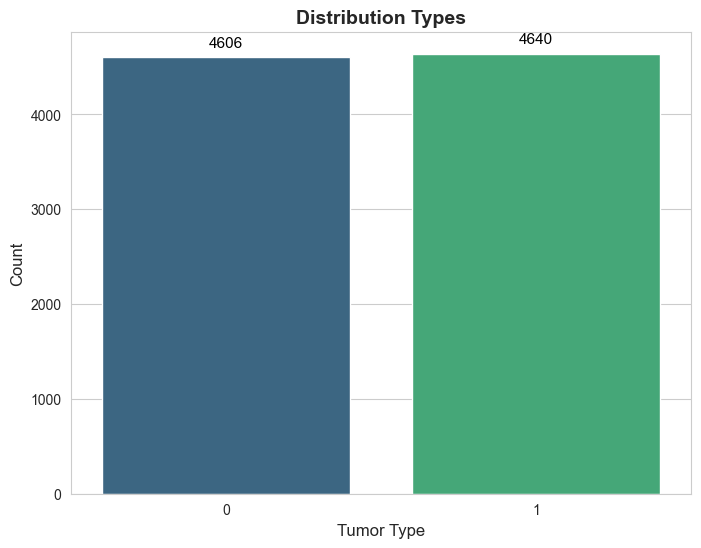

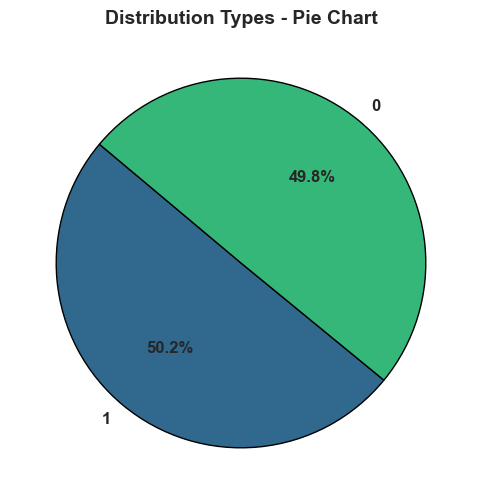

In [ ]:
import seaborn as sns # pyright: ignore[reportMissingModuleSource]
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(data=df, x="label", palette="viridis", ax=ax)
ax.set_title("Distribution Types", fontsize=14, fontweight='bold')
ax.set_xlabel("Tumor Type", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
    (p.get_x() + p.get_width() / 2., p.get_height()),
    ha='center', va='bottom', fontsize=11, color='black',
    xytext=(0, 5), textcoords='offset points')
plt.show()
label_counts = df["label"].value_counts()
fig, ax = plt.subplots(figsize=(8, 6))
colors = sns.color_palette("viridis", len(label_counts))
ax.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%',
startangle=140, colors=colors, textprops={'fontsize': 12, 'weight':'bold'},
wedgeprops={'edgecolor': 'black', 'linewidth': 1})
ax.set_title("Distribution Types - Pie Chart", fontsize=14,
fontweight='bold')
plt.show()


Processing label 0: fractured
Found 6 images for fractured

Processing label 1: not fractured
Found 6 images for not fractured

 Successfully loaded 12 images


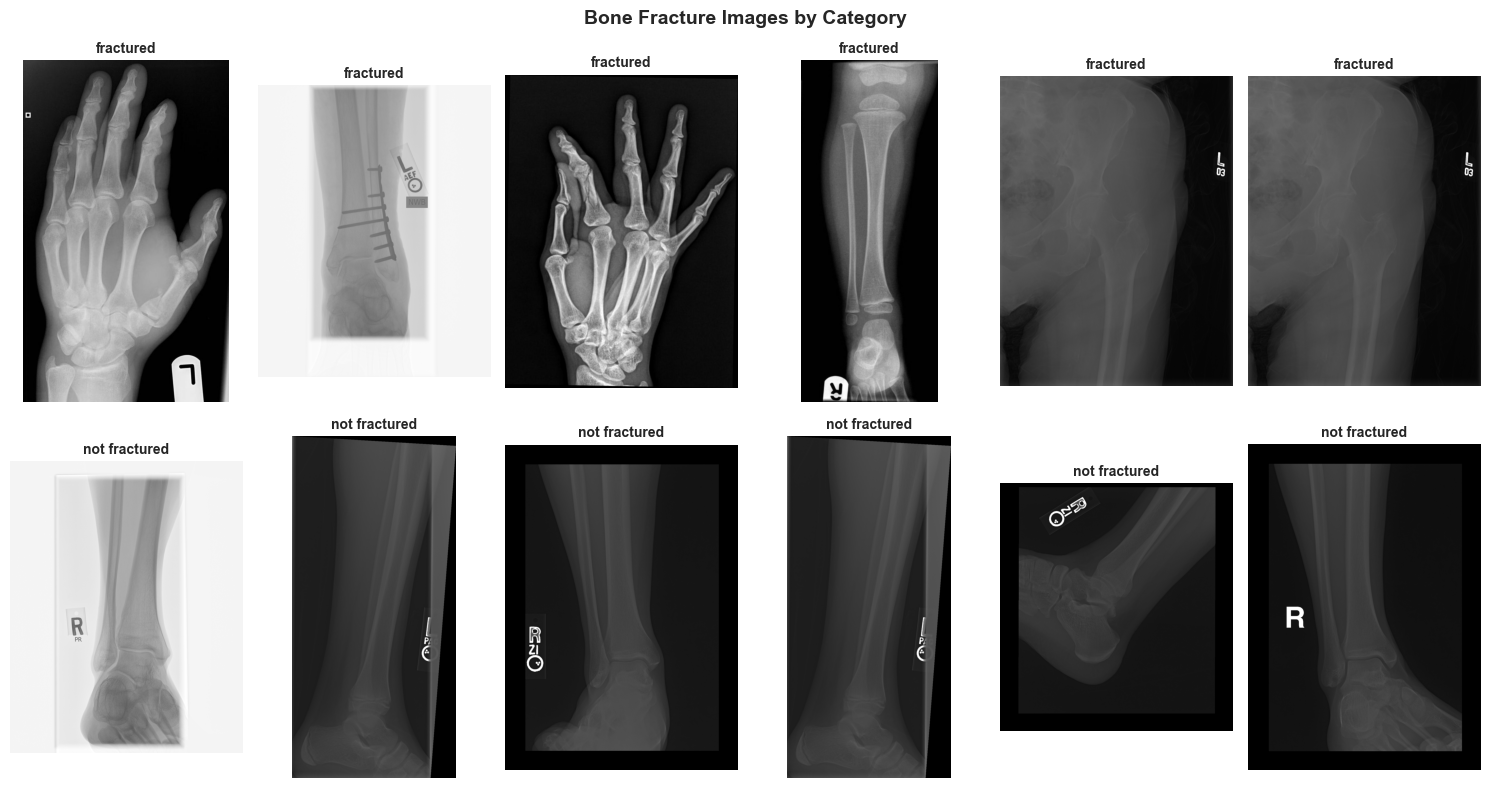

In [14]:
import cv2

num_images = 6
plt.figure(figsize=(15, 8))

# Map numeric labels to category names
label_map = {0: "fractured", 1: "not fractured"}

subplot_count = 0
for i, (label, category_name) in enumerate(label_map.items()):
    print(f"\nProcessing label {label}: {category_name}")
    
    # Filter by numeric label
    category_images = df[df['label'] == label]['image_path'].iloc[:num_images]
    print(f"Found {len(category_images)} images for {category_name}")
    for j, img_path in enumerate(category_images):
        try:
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                subplot_count += 1
                plt.subplot(2, num_images, subplot_count)
                plt.imshow(img)
                plt.axis('off')
                plt.title(category_name, fontsize=10, fontweight='bold')
            else:
                print(f" Failed to load: {img_path}")
                
        except Exception as e:
            print(f" Error loading {img_path}: {str(e)}")

if subplot_count == 0:
    print("\nWarning: No images were loaded!")
else:
    print(f"\n Successfully loaded {subplot_count} images")

plt.suptitle('Bone Fracture Images by Category', fontsize=14, fontweight='bold')
plt.tight_layout()  
plt.show()

Using device: cuda
GPU: NVIDIA GeForce RTX 3050 6GB Laptop GPU
Epoch 01 | Loss: 0.6187 | Val Acc: 0.5427
Epoch 02 | Loss: 0.4101 | Val Acc: 0.6854
Epoch 03 | Loss: 0.2945 | Val Acc: 0.8027
Epoch 04 | Loss: 0.1998 | Val Acc: 0.7400
Epoch 05 | Loss: 0.1480 | Val Acc: 0.8686
Epoch 06 | Loss: 0.1314 | Val Acc: 0.8730
Epoch 07 | Loss: 0.1427 | Val Acc: 0.9135
Epoch 08 | Loss: 0.1011 | Val Acc: 0.9465
Epoch 09 | Loss: 0.0754 | Val Acc: 0.8427
Epoch 10 | Loss: 0.0694 | Val Acc: 0.9649
Epoch 11 | Loss: 0.0587 | Val Acc: 0.9232
Epoch 12 | Loss: 0.0806 | Val Acc: 0.9670
Epoch 13 | Loss: 0.0384 | Val Acc: 0.9308
Epoch 14 | Loss: 0.0399 | Val Acc: 0.9827
Epoch 15 | Loss: 0.0422 | Val Acc: 0.9870
Epoch 16 | Loss: 0.0473 | Val Acc: 0.9708
Epoch 17 | Loss: 0.0392 | Val Acc: 0.9795
Epoch 18 | Loss: 0.0322 | Val Acc: 0.9724
Early stopping triggered at epoch 18


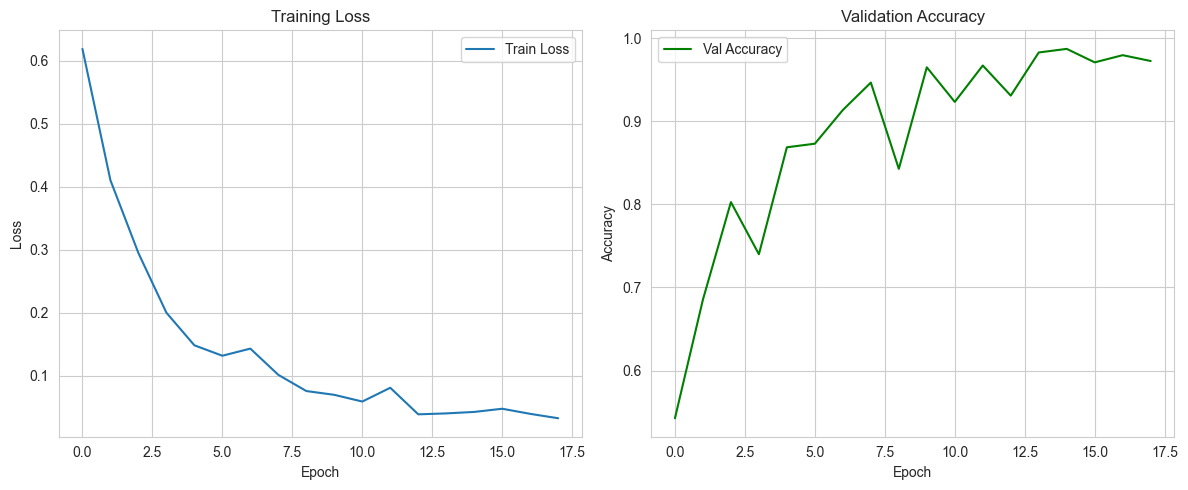


=== Classification Report ===
               precision    recall  f1-score   support

    fractured       1.00      0.98      0.99       922
not fractured       0.98      1.00      0.99       928

     accuracy                           0.99      1850
    macro avg       0.99      0.99      0.99      1850
 weighted avg       0.99      0.99      0.99      1850



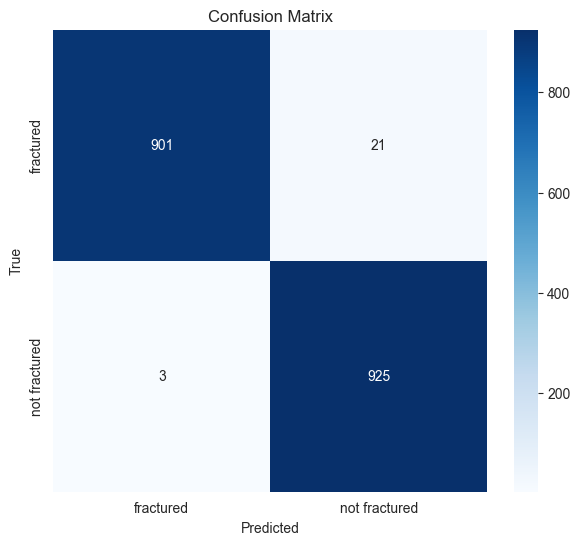


Final Val Accuracy: 0.9870
Remaining parameters: 11,177,538 (95.6% of original)

Model saved! Training completed on cuda


In [20]:
import torch
import torch.nn as nn
import torchvision
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image, ImageFile
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

ImageFile.LOAD_TRUNCATED_IMAGES = True

# Set device (automatically use GPU if available, otherwise CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
if device.type == 'cuda':
    print(f"GPU: {torch.cuda.get_device_name(0)}")

train_df, val_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)

class FractureDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.transform = transform
        
    def __len__(self): 
        return len(self.df)
    
    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        img = Image.open(row['image_path']).convert('RGB')
        label = row['label']  # Keep as numeric (0 or 1)
        if self.transform: 
            img = self.transform(img)
        return img, label

transform = transforms.Compose([   
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_dataset = FractureDataset(train_df, transform)
val_dataset = FractureDataset(val_df, transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64)

model = torchvision.models.resnet18(weights='DEFAULT')
model.fc = nn.Linear(model.fc.in_features, 2)

# Move model to device
model = model.to(device)

def synflow_pruning(model, sparsity=0.95, iters=100):
    model.train()
    for p in model.parameters():
        if p.dim() > 1: 
            p.data = torch.abs(p.data)
    
    # Create dummy input on the same device as model
    dummy = torch.randn(1, 3, 224, 224).to(device)
    
    for _ in range(iters):
        out = model(dummy)
        loss = out.sum()
        model.zero_grad()
        loss.backward()
        for p in model.parameters():
            if p.grad is not None and p.dim() > 1:
                p.data = p.data * torch.abs(p.grad)
    
    scores = {}
    for n, p in model.named_parameters():
        if p.dim() > 1: 
            scores[n] = p.data.abs().flatten()
    
    total = sum(s.numel() for s in scores.values())
    thr = torch.topk(torch.cat([s for s in scores.values()]), 
                     int(total * sparsity), largest=False)[0].max()
    
    for n, p in model.named_parameters():
        if p.dim() > 1:
            mask = (p.data.abs() >= thr).float()
            p.data *= mask
    return model

model = synflow_pruning(model, sparsity=0.95)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

train_losses = []
val_accs = []
best_acc = 0.0
patience = 3
wait = 0

for epoch in range(30):
    model.train()
    epoch_loss = 0.0
    for X, y in train_loader:
        X, y = X.to(device), y.to(device)
        optimizer.zero_grad()
        pred = model(X)
        loss = criterion(pred, y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    train_losses.append(epoch_loss / len(train_loader))

    model.eval()
    correct = 0
    with torch.no_grad():
        for X, y in val_loader:
            X, y = X.to(device), y.to(device)
            pred = model(X).argmax(1)
            correct += (pred == y).sum().item()
    
    acc = correct / len(val_dataset)
    val_accs.append(acc)
    print(f"Epoch {epoch+1:02d} | Loss: {train_losses[-1]:.4f} | Val Acc: {acc:.4f}")

    if acc > best_acc:
        best_acc = acc
        torch.save(model.state_dict(), 'best_fracture_model.pth')
        wait = 0
    else:
        wait += 1
        if wait >= patience:
            print(f"Early stopping triggered at epoch {epoch+1}")
            break

model.load_state_dict(torch.load('best_fracture_model.pth', map_location=device))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss')

plt.subplot(1, 2, 2)
plt.plot(val_accs, label='Val Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Validation Accuracy')

plt.tight_layout()
plt.savefig('curves.png')
plt.show()

all_preds, all_labels = [], []
model.eval()
with torch.no_grad():
    for X, y in val_loader:
        X = X.to(device)
        pred = model(X).argmax(1).cpu().numpy()
        all_preds.extend(pred)
        all_labels.extend(y.numpy())

cm = confusion_matrix(all_labels, all_preds)
print("\n=== Classification Report ===")
print(classification_report(all_labels, all_preds, 
                          target_names=['fractured', 'not fractured']))

plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['fractured', 'not fractured'],
            yticklabels=['fractured', 'not fractured'])

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
plt.show()

final_acc = np.mean(np.array(all_preds) == np.array(all_labels))
print(f"\nFinal Val Accuracy: {final_acc:.4f}")

total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Remaining parameters: {total_params:,} ({total_params/11_689_512*100:.1f}% of original)")

torch.save(model.state_dict(), 'fracture_detector_final.pth')
print(f"\nModel saved! Training completed on {device}")